<a href="https://colab.research.google.com/github/JayanneAzevedo/Data_Science_Projects/blob/main/Fraudulent_Transactions_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Fraud Detection in Online Payment Transactions**

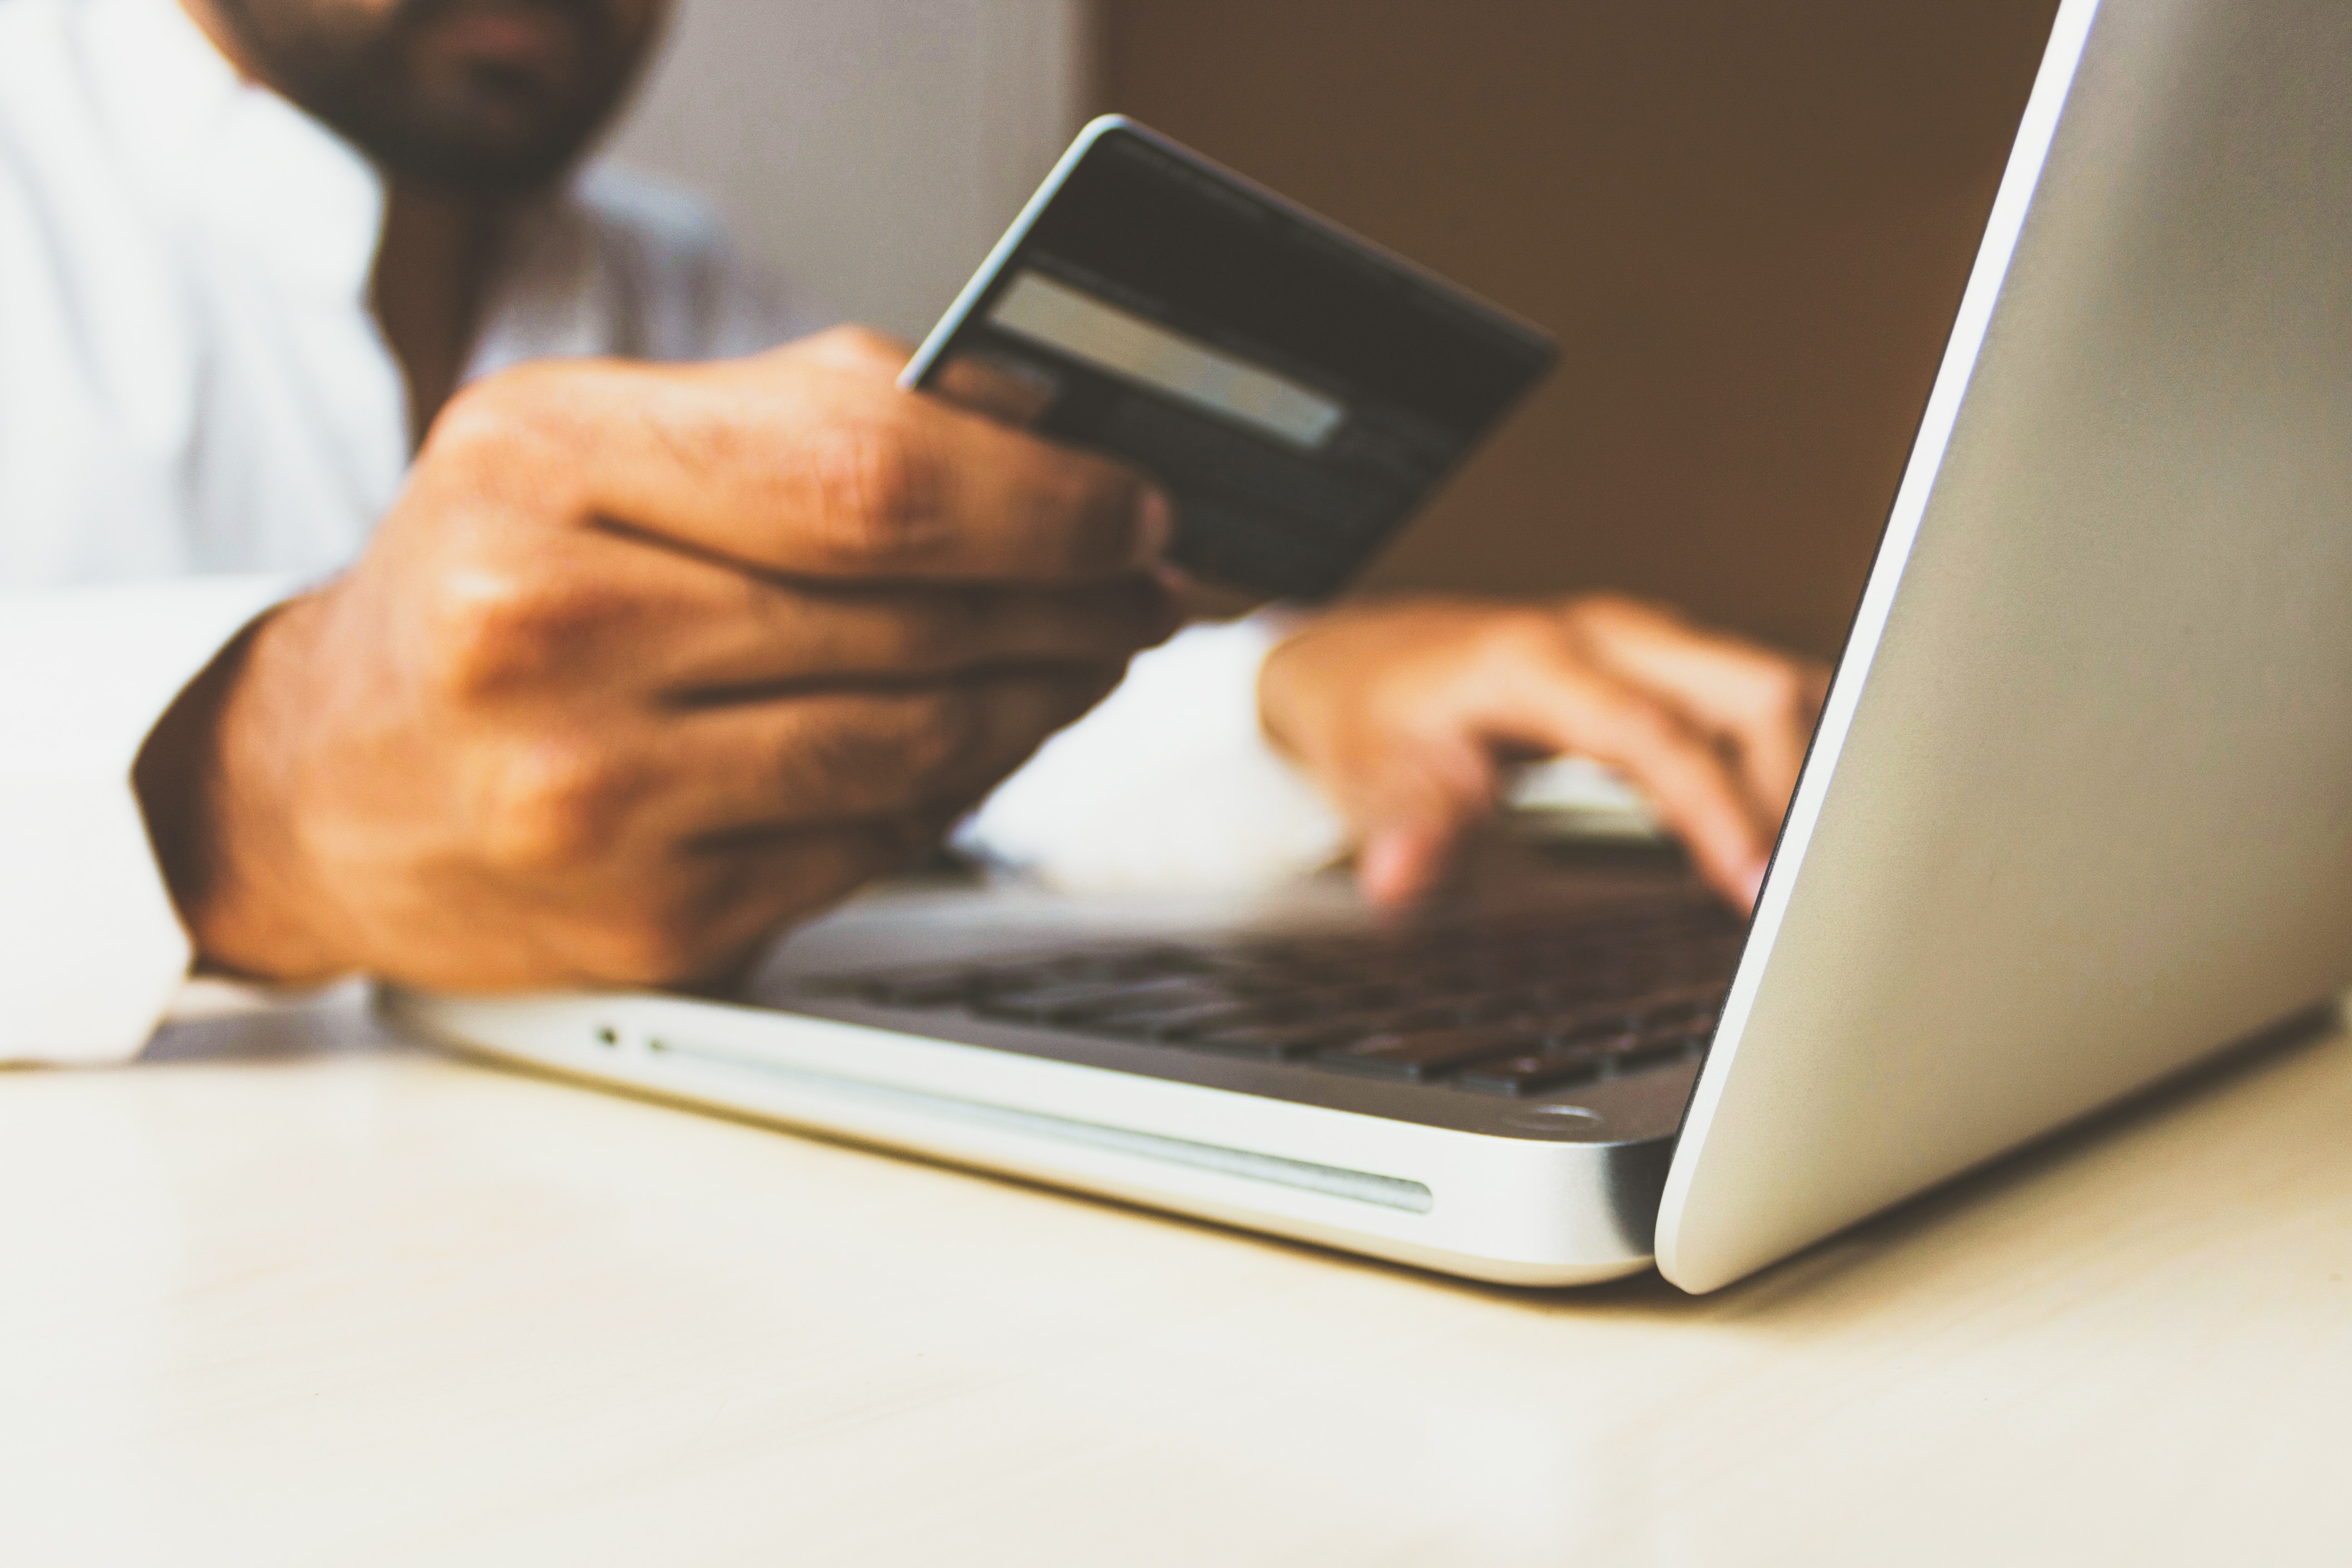

### **1. Business Problem**

Online payment transactions are present all over the world in people's daily lives. Due to this common and well-established resource, financial companies must constantly improve payment fraud detection and prevention methods to protect customers.

For this reason, this notebook aims to develop a predictive method for fraud detection in online payments.

### **1.1 Data Collection**

This dataset is available on [Kaggle](https://www.kaggle.com/datasets/chitwanmanchanda/fraudulent-transactions-data).


The below column reference:

**1. step:** maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation);

**2. type:** type of online transaction - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER;

**3. amount:** the amount of the transaction in local currency;

**4. nameOrig:** customer starting the transaction;

**5. oldbalanceOrg:** initial balance before the transaction;

**6. newbalanceOrig:** balance after the transaction;

**7. nameDest:** recipient of the transaction;

**8. oldbalanceDest:** initial balance of recipient before the transaction;

**9. newbalanceDest:** the new balance of recipient after the transaction;

**10. isFraud:** fraud transaction;

**11. isFlaggedFraud:** the business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

### **2. Exploratory Data Analysis**

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
# Importing data
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/fraud.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df

step      type      amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT     9839.64  C1231006815      170136.00   
1           1   PAYMENT     1864.28  C1666544295       21249.00   
2           1  TRANSFER      181.00  C1305486145         181.00   
3           1  CASH_OUT      181.00   C840083671         181.00   
4           1   PAYMENT    11668.14  C2048537720       41554.00   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0             160296.36  M1979787155            0.00            0.00        0   
1              19384.72  M2044282225            0.00            0.00        0   
2                  0.00   C553264065            0.00            0.00        1   
3                  0.00    C38997010        21182.00            0.00        1   
4              29885.86  M1230701703            0.00            0.00        0   
...                 ...          ...             ...             ...      ...   
6362615            0.00   C776919290            0.00       339682.13        1   
6362616            0.00  C1881841831            0.00            0.00        1   
6362617            0.00  C1365125890        68488.84      6379898.11        1   
6362618            0.00  C2080388513            0.00            0.00        1   
6362619            0.00   C873221189      6510099.11      7360101.63        1   

         isFlaggedFraud  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  
...                 ...  
6362615               0  
6362616               0  
6362617               0  
6362618               0  
6362619               0  

[6362620 rows x 11 columns]

In [4]:
# Getting information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
# Checking missing values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
# Installing dataprep package
!pip install dataprep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.5 MB 5.2 MB/s 
     |████████████████████████████████| 435 kB 49.9 MB/s 
     |████████████████████████████████| 95 kB 4.6 MB/s 
     |████████████████████████████████| 1.0 MB 65.8 MB/s 
     |████████████████████████████████| 943 kB 62.9 MB/s 
     |████████████████████████████████| 133 kB 57.5 MB/s 
     |████████████████████████████████| 749 kB 55.0 MB/s 
     |████████████████████████████████| 78 kB 8.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 965 kB 52.7 MB/s 
     |████████████████████████████████| 50 kB 6.4 MB/s 
     |████████████████████████████████| 1.1 MB 51.9 MB/s 
     |████████████████████████████████| 144 kB 59.8 MB/s 
     |████████████████████████████████| 94 kB 2.4 MB/s 
     |████████████████████████

DataPrep Report
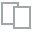
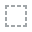
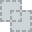
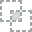
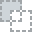
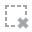
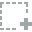
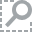
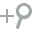
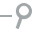
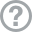
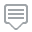
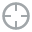
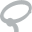
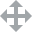
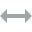
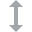
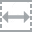
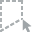
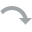
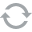
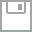
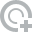
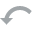
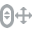
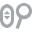
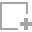
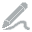
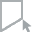
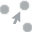
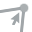
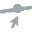

In [8]:
# Generating automated report
from dataprep.eda import create_report
create_report(df)

In [9]:
# Exploring type transaction
print(df.type.value_counts())

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


In [10]:
# Exploring type transaction and creating donut chart

type = df["type"].value_counts()
transactions = type.index
quantity = type.values

import plotly.express as px
figure = px.pie(df,
                values = quantity,
                names = transactions, hole = 0.5,
                title = 'Distribution of Transaction Type')
figure.show()

In [11]:
# Checking target correlation
correlation = df.corr()
print(correlation['isFraud'].sort_values(ascending = False))

isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64


### **3. Data Preprocessing**

In [12]:
# Label enconding for object to numeric conversion
df['type'] = df['type'].map({'CASH_OUT': 1, 'PAYMENT': 2, 'CASH_IN': 3, 
                             'TRANSFER': 4, 'DEBIT': 5})

In [13]:
# Changing 'isFraud' label - from number to text
df['isFraud'] = df['isFraud'].map({0: 'No Fraud', 1: 'Fraud'})
print(df.head())

   step  type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1     2   9839.64  C1231006815       170136.0       160296.36   
1     1     2   1864.28  C1666544295        21249.0        19384.72   
2     1     4    181.00  C1305486145          181.0            0.00   
3     1     1    181.00   C840083671          181.0            0.00   
4     1     2  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest   isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0  No Fraud               0  
1  M2044282225             0.0             0.0  No Fraud               0  
2   C553264065             0.0             0.0     Fraud               0  
3    C38997010         21182.0             0.0     Fraud               0  
4  M1230701703             0.0             0.0  No Fraud               0  


In [14]:
df.head()

step  type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1     2   9839.64  C1231006815       170136.0       160296.36   
1     1     2   1864.28  C1666544295        21249.0        19384.72   
2     1     4    181.00  C1305486145          181.0            0.00   
3     1     1    181.00   C840083671          181.0            0.00   
4     1     2  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest   isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0  No Fraud               0  
1  M2044282225             0.0             0.0  No Fraud               0  
2   C553264065             0.0             0.0     Fraud               0  
3    C38997010         21182.0             0.0     Fraud               0  
4  M1230701703             0.0             0.0  No Fraud               0

In [15]:
# Statistics description
df.describe().T

count          mean           std  min       25%  \
step            6362620.0  2.433972e+02  1.423320e+02  1.0    156.00   
type            6362620.0  2.055307e+00  9.808966e-01  1.0      1.00   
amount          6362620.0  1.798619e+05  6.038582e+05  0.0  13389.57   
oldbalanceOrg   6362620.0  8.338831e+05  2.888243e+06  0.0      0.00   
newbalanceOrig  6362620.0  8.551137e+05  2.924049e+06  0.0      0.00   
oldbalanceDest  6362620.0  1.100702e+06  3.399180e+06  0.0      0.00   
newbalanceDest  6362620.0  1.224996e+06  3.674129e+06  0.0      0.00   
isFlaggedFraud  6362620.0  2.514687e-06  1.585775e-03  0.0      0.00   

                       50%           75%           max  
step               239.000  3.350000e+02  7.430000e+02  
type                 2.000  3.000000e+00  5.000000e+00  
amount           74871.940  2.087215e+05  9.244552e+07  
oldbalanceOrg    14208.000  1.073152e+05  5.958504e+07  
newbalanceOrig       0.000  1.442584e+05  4.958504e+07  
oldbalanceDest  132705.665  9.430367e+05  3.560159e+08  
newbalanceDest  214661.440  1.111909e+06  3.561793e+08  
isFlaggedFraud       0.000  0.000000e+00  1.000000e+00

In [16]:
# Target evaluation
df.isFraud.value_counts()

No Fraud    6354407
Fraud          8213
Name: isFraud, dtype: int64

In [17]:
# Splitting dependents variables (x) from Target variable (y)
from sklearn.model_selection import train_test_split
x = np.array(df[['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig']])
y = np.array(df[['isFraud']])

### **4. Predictive Model Building**

In [18]:
# Training Predictive Model with Machine Learning - Decision Tree

# Importing model
from sklearn.tree import DecisionTreeClassifier

# Splitting dataset for trainig and test
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.10, random_state=42)

# Training model with train data
model = DecisionTreeClassifier()
model.fit(xtrain, ytrain)

# Printing model test score
print(model.score(xtest, ytest))

0.9997406728674666


In [19]:
# Making predictions with test data
ypred = model.predict(xtest)

In [20]:
ypred

array(['No Fraud', 'No Fraud', 'No Fraud', ..., 'No Fraud', 'No Fraud',
       'No Fraud'], dtype=object)

### **5. Evaluating Predictive Model**

In [21]:
# Evaluating predictive model
print('Classification Report Metrics: \n', classification_report(ytest, ypred))
print('Accuracy: \n', accuracy_score(ytest, ypred))
print('Confusion Matrix: \n', confusion_matrix(ytest, ypred))


Classification Report Metrics: 
               precision    recall  f1-score   support

       Fraud       0.90      0.89      0.90       817
    No Fraud       1.00      1.00      1.00    635445

    accuracy                           1.00    636262
   macro avg       0.95      0.95      0.95    636262
weighted avg       1.00      1.00      1.00    636262

Accuracy: 
 0.9997406728674666
Confusion Matrix: 
 [[   729     88]
 [    77 635368]]


### **6. Making New Predictions**

**Case 1**

In [22]:
# Prediction
# features = [type, amount, oldbalanceOrg, newbalanceOrig]
features = np.array([[4, 9000.60, 9000.60, 0.0]])
print(model.predict(features))

['Fraud']


**Case 2**

In [23]:
# Prediction
# features = [type, amount, oldbalanceOrg, newbalanceOrig]
features = np.array([[2, 5000, 5000, 0.0]])
print(model.predict(features))

['No Fraud']
